Network Science FSS 2022

# Home Assignment 3



Submit your solution via Ilias until 23.59pm on Monday, May 16th. Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 2 students. Unless explicitly agreed otherwise in advance, **submissions from teams with more or less members will NOT be graded**.
List all members of the team with their student ID and full name in the cell below, and submit only one notebook per team. Only submit a notebook, do not submit the dataset(s) you used or image files that you have created - these have to be created from your notebook. Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

#### General guidelines:
* Make sure that your code is executable, any task for which the code does directly not run on our machine will be graded with 0 points.
* Use only packages that are automatically installed along with Anaconda, plus some additional packages that have been introduced in the context of this class.
* Ensure that the notebook does not rely on the current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading a file, make sure that it has the form `nx.read_edgelist("example.edgelist")` instead of `nx.read_edgelist("C:/User/Path/to/your/Homework/example.edgelist")` so that the code directly works from our machines. 
* Make sure you clean up your code before submission, e.g., properly align your code, and delete every line of code that you do not need anymore, even if you may have experimented with it. Minimize usage of global variables. Do not reuse variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Feel free to use comments in the code. While we do not require them to get full marks, they may help us in case your code has minor errors.
* For questions that require a textual answer, please do not write the answer as a comment in a code cell, but in a Markdown cell below the code. Always remember to provide sufficient justification for all answers.
* You may create as many additional cells as you want, just make sure that the solutions to the individual tasks can be found near the corresponding assignment.
* If you have any general question regarding the understanding of some task, do not hesitate to post in the student forum in Ilias, so we can clear up such questions for all students in the course.

##### List team members, including all student IDs, in the cell below:

In [64]:
# credentials of all team members
team_members = [
    {
        'first_name': 'Emanuela',
        'last_name': 'Kuhlman',
        'student_id': 1580703
    }
]

In [1]:
# general immports may go here!
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple, Dict
from collections import defaultdict
import pandas as pd
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import girvan_newman

### The Hamsterster Network

In this home assignment we will conduct some analysis of the Hamsterster Network, next to a number of simulations. This network contains friendships and family links between users of the website hamsterster.com, which was an online social network of hamster owners and is now shut down. 
The network data has been taken from the KONECT repository, and consists of multiple data files. For simplicity, we will only consider the biggest connected component of the network.

__References:__  
[1] Jérôme Kunegis. KONECT - The Koblenz Network Collection. In Proc. Int. Web Observatory Workshop, pages 1343-1350, 2013  
[2] Hamsterster full network dataset -- KONECT, April 2017. [ http://konect.cc/networks/petster-hamster/ ]

### Task 1:  Analyzing the Hamsterster Network (22 pts)


#### a) Loading the Network (5 pts)
The information of the network is stored in multiple files, where one file contains the edges in the network, and one file contains node attributes. Next to the edges, some of the attributes are also of particular interest for us, namely 
the hamster's  
(1) gender,  
(2) species (divided into Hamster and Gerbil),  
(3) home country (divided into either USA or others).

Read in the Hamsterster Network from the datasets that we have provided. In particular, join the information regarding the edges with the desired information regarding the three node attributes in a graph ``G``. Save the three node attributes in ``G`` using attribute names ``'gender'``, ``'species'`` and ``'home'``. Only use attribute values ``'male'`` and ``'female'`` for the gender, ``'hamster'`` and ``'gerbil'`` for the species and ``'usa'`` and ``'other'`` for the home country (do not use upper case letters in the attribute names and values). 

After reading in the full network data, delete all nodes from ``G`` which do not belong to its biggest connected component. Do NOT reindex the nodes though! In the end, save the (new) numbers of nodes and edges of ``G`` in ``n_nodes`` and ``n_edges``. Save the attribute values of node 1 in a dictionary ``sample_attr`` with format ``{'gender': 'VALUE1', 'species': 'VALUE2', 'home': 'VALUE3'}`` .

_Hint: Note that for the species and home country, you can **not** directly take the values from the data file, you have to preprocess them first. Additionally, make sure to transform upper to lower case letters (also for gender)._

**Important: Make sure that you do not modify ``G`` anymore in the following tasks (especially in task 4), i.e. create copies before modifying the graph.**

In [2]:
G = nx.read_edgelist(path="./hamsterster.edgelist", comments = "%")
data = pd.read_csv("./hamsterster.csv", sep= " ")

data["dat.species"] = data["dat.species"].apply(lambda x: "hamster" if "Hamster" in x else "gerbil")
data["dat.gender"] = data["dat.gender"].apply(lambda x: x.lower())
data["dat.hometown"] = data["dat.hometown"].apply(lambda x: "usa" if "United States" in x else "other")
data["ent"] = data["ent"].apply(lambda x: str(x))

species = dict(zip(data["ent"],data["dat.species"]))
gender = dict(zip(data["ent"],data["dat.gender"]))
hometown = dict(zip(data["ent"],data["dat.hometown"]))

nx.set_node_attributes(G, species, name="species")
nx.set_node_attributes(G, gender, name="gender")
nx.set_node_attributes(G, hometown, name="home")

largest_cc = max(nx.connected_components(G), key=len)

nodes = list(nx.nodes(G))
for node in nodes:
    if node not in largest_cc:
        G.remove_node(node)
n_nodes=G.nodes
n_edges=G.edges
sample_attr = {'gender': G.nodes['1']['gender'], 'species': G.nodes['1']['species'], 'home': G.nodes['1']['home']}
sample_attr

{'gender': 'male', 'species': 'hamster', 'home': 'usa'}

#### b) Basic Network Analysis (3 pts)

Conduct a basic network analysis of ``G``, i.e. compute the network's density, the average path length, the diameter and its average clustering coefficient. Store the results in ``density``, ``avg_pl``, ``diameter`` and ``avg_cc``. Finally, plot the degree distribution.

Does the network display the properties that you would typically expect from a social network?

In [9]:
density= nx.density(G)
avg_pl = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)
avg_cc = nx.average_clustering(G)
print(" Network's density:", density, "\n", "Average path length:", avg_pl,"\n","The diameter:", diameter, "\n","Average Clustering coefficient:",avg_cc)

 Network's density: 0.007824944087377392 
 Average path length: 3.4525845276520464 
 The diameter: 14 
 Average Clustering coefficient: 0.1429132061246609


In [36]:
components = list(nx.connected_components(G))
len(components[0])

1786

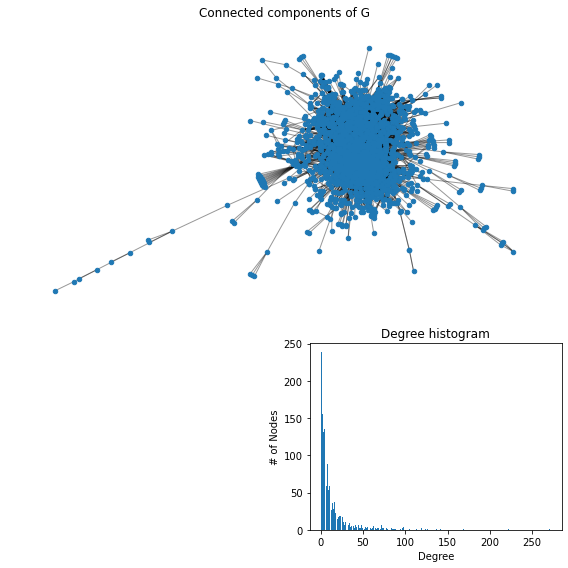

In [42]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of graph", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
CC = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(CC, seed=10396953)
nx.draw_networkx_nodes(CC, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(CC, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()


ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()
#https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

**A1b):** 
The network's density is 0.0078, following the tendency of social networks to have very low density values. On the other hand, the average clustering coefficient is ~ 0.143 and the average path is short (3,4). These could be indicator of the small-world phenomenon

#### c) Analyzing Assortativity (3 pts)

Compute the network's degree assortativity coefficient and store it in a variable ``dac``. 

As introduced in the exercise, the average degree correlation (or *average degree connectivity*) $k_{nn}(k)$ computes the average nearest neighbor degree of nodes with degree $k$. Plot the average degree correlation $k_{nn}(k)$ against $k$.

You can use functions from `networkx`.

Would you say that this network is assortative, disassortative, or rather neutral? Does the result coincide with what is typically observed in social networks?

In [18]:
dac = nx.degree_assortativity_coefficient(G)
#adc = nx.average_degree_connectivity(G)
dac

-0.08881087195398325

In [19]:
avg_neighbor_degrees = nx.average_neighbor_degree(G)
adc = defaultdict(list)
for node, degree in nx.degree(G):
    adc[degree].append(avg_neighbor_degrees[node])

(array([27., 27., 22., 15.,  4.,  5.,  1.,  0.,  1.,  1.]),
 array([  1.,  28.,  55.,  82., 109., 136., 163., 190., 217., 244., 271.]),
 <BarContainer object of 10 artists>)

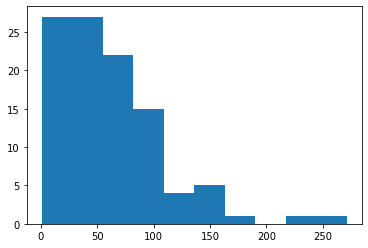

In [22]:
plt.hist(adc)

**A1c):** assortativity coefficient smaller than zero (-0.0888) and the average degree correlation decrease with the increase of the degree k, the network is dissasortative.

#### d) Analyzing Homophily (3 pts)

We want to compute the network's homophily with respect to the hamster's  
(1) gender,  
(2) species (divided into Hamster and Gerbil),  
(3) home country (divided into either USA or others),  
i.e., the attributes that have been read in a).


For each of these three attributes: \
(i) partition the network according to the attribute values, \
(ii) measure the homophily of the partition by computing the modularity,  \
(iii) argue whether the network is homophilic or heterophilic with respect to that attribute.

Store the modularity values in ``m_gender``, ``m_species`` and ``m_home``.

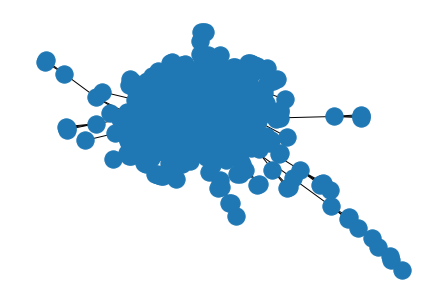

In [33]:
H = G.copy()
nx.draw(H, with_labels=False)

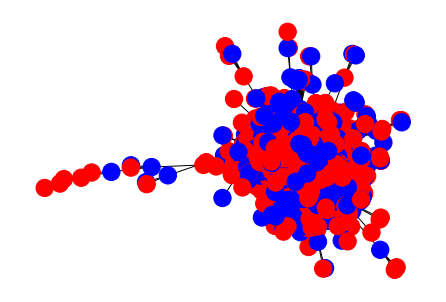

In [34]:
gender_color = {
    'female': 'red',
    'male':'blue'

}
node_colors = [gender_color[H.nodes[n]['gender']] for n in H.nodes]
nx.draw(H, node_color=node_colors, with_labels=False)

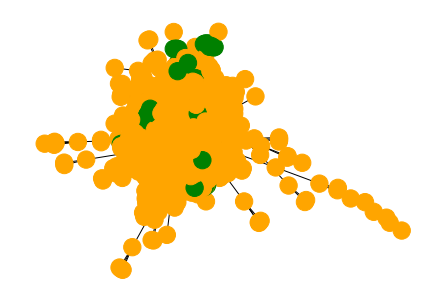

In [25]:
species_color = {
    'hamster': 'orange',
    'gerbil':'green',
}
node_colors = [species_color[H.nodes[n]['species']] for n in H.nodes]
nx.draw(H, node_color=node_colors, with_labels=False)

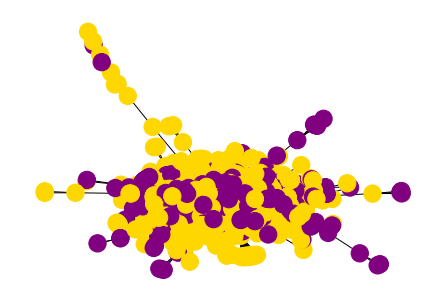

In [26]:
home_color = {
    'usa': 'gold',
    'other':'purple'
}
node_colors = [home_color[H.nodes[n]['home']] for n in H.nodes]
nx.draw(H, node_color=node_colors, with_labels=False)

In [27]:
genders = {
    'male': set(),
    'female': set(),
}
species = {
    'hamster': set(),
    'gerbil': set(),
}
home = {
    'usa': set(),
    'other': set(),
}

for n in H.nodes:
    gender = H.nodes[n]['gender']
    genders[gender].add(n)
    specie = H.nodes[n]['species']
    species[specie].add(n)
    houses = H.nodes[n]['home']
    home[houses].add(n)


In [28]:
gender_partition = list(genders.values())
species_partition = list(species.values())
home_partition = list(home.values())

In [29]:
nx.community.is_partition(H, gender_partition)

True

In [30]:
m_gender = nx.community.quality.modularity(H, gender_partition)
m_species = nx.community.quality.modularity(H, species_partition)
m_home = nx.community.quality.modularity(H, home_partition)

In [31]:
print("Gender modularity: ", m_gender, "\n","Species modularity: ", m_species, "\n","Home modularity: ", m_home ,"\n",)

Gender modularity:  0.004850252059561272 
 Species modularity:  0.013721227685842946 
 Home modularity:  0.06453063125289937 



**A1d):** _Home modularity has a higher modularity compared to gender and species, it shows more assortative mixing - homophily._

#### e) Minorities in the Hamsterster Network (8 pts)

Finally, we want to analyze how minorities and homophily interplay on this network with respect to the three attributes gender, species and home country.

To evaluate the effects of homophily on minorities with respect to these three attributes  
(i) compute the shares of the hamsters belonging to each category of each of the three given attributes,    
(ii) plot the degree distributions of both classes per attribute against each other,  
(iii) compute the average node-wise perception biases regarding the size of the minority group for both majority and minority with respect to each of the three attributes.

Store the shares of hamsters into dictionaries ``dist_gender``, ``dist_species`` and ``dist_home`` with format given below and plot the degree distributions. Store the perception biases in ``pb_gender``, ``pb_species`` and ``pb_home`` with format given below, where ... is replaced by the respective float values:

``dist_gender = {'male': ..., 'female': ...}
 dist_species = {'hamster': ..., 'gerbil': ...}
 dist_home = {'usa': ..., 'other': ...}``

``pb_gender = {'majority': ..., 'minority': ...}
 pb_species = {'majority': ..., 'minority': ...}
 pb_home = {'majority': ..., 'minority': ...}``

Interpret these results in light of the findings presented in the lecture and exercise 6 (tasks 1c and 1e)!


In [29]:
# you may use this function to compute the node-wise perception biases
def perception_bias(G: nx.Graph, attr: str) -> Dict[str, float]:
    """
    :param G: networkx graph on which we want to compute all biases
    :param attr: string specifying the name of the node attribute which stores the information
    :            whether a node belongs to the majority or minority group. The value of that attribute should be 0 
    :            if the node belongs to the minority, and 1 otherwise
    :
    :return: dictionary with node IDs as keys and their respective individual perception bias as value
    """
    f_m = 1 - sum(G.nodes[v][attr] for v in G.nodes)/G.number_of_nodes()
    bias_dict = dict()
    for v in G.nodes:
        bias_dict[v] = 1/f_m/G.degree(v)*sum(1-G.nodes[w][attr] for w in G[v])
    return bias_dict

**A1e):** _Please provide your answer here!_

### Task 2:  Detecting Communities in Stochastic Block Models (17 pts)

In this task you should use functions from `networkx` wherever possible.

#### a) Creating  Graphs According to Stochastic Block Models (4 pts)

In this task we want to generate two networks ``G1`` and ``G2`` according to the following specifications of stochastic block models:
* Both networks should contain 400 nodes, divided into four communities of 100 nodes each. 
* Within each community, the probability of an edge existing should be .05 for ``G1``, and 0.02 for ``G2``.
* Between adjacent communities (1 and 2, 2 and 3, 3 and 4, **AND 1 and 4**) the probability of an edge existing should be 0.001 for ``G1``, and 0.005 for ``G2``.
* There should be no other edges.
* To obtain reproducible results, you have to **pass a random seed** to the stochastic block model generator function from `networkx`. Pass `seed = 2021`, as initialised in the cell below!
* Each node should have an attribute ``'community'`` which indicates the community (`int(1)` - `int(4)`) that it belongs to.
* In the end, you should remove all nodes which are not in the biggest connected component of the resulting graphs.

Create two 4x4 matrices ``probs_G1`` and ``probs_G2`` (use a list of lists), where ``probs_G1[i][j] == probs_G1[j][i]`` should be the probability that an edge exists between individual nodes from community `i` and individual nodes from community `j` in ``G1`` (same for ``probs_G2`` and ``G2``). 
Afterwards, apply the stochastic block model generator from `networkx` to create ``G1`` and ``G2`` from these matrices, following all the specifications listed above. Again, make sure to use the specified seed, and to filter for the biggest connected component as described above.

Plot the resulting graphs using a spring layout and color the nodes according to the community they belong to, i.e. two nodes should have the same color if and only if they belong to the same community. 

_Hint: When initialising ``probs_G1`` and ``probs_G2``, don't forget to also include the probability of an edge existing **within** a community._

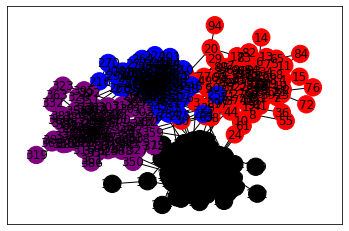

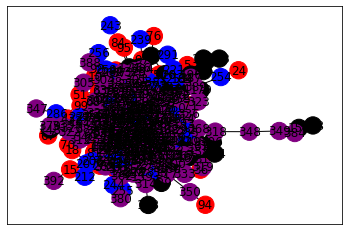

In [43]:
seed = 2021
sizes = [100, 100, 100, 100]
probs_G1 = [[0.05, 0.001, 0.001,0.001],
            [0.001, 0.05, 0.001,0.001],
            [0.001, 0.001, 0.05,0.001],
            [0.001, 0.001, 0.001,0.05]]

probs_G2 = [[0.02, 0.005, 0.005,0.005],
            [0.005, 0.02, 0.005,0.005],
            [0.005, 0.005, 0.02,0.005],
            [0.005, 0.005, 0.005,0.02]]

G1 = nx.stochastic_block_model(sizes, probs_G1, seed=seed)
G2 = nx.stochastic_block_model(sizes, probs_G2, seed=seed)

for i in range(400):
    if i<100:
        nx.set_node_attributes(G1,values={i:1},name='community')
        nx.set_node_attributes(G2,values={i:1},name='community')
    elif i<200:
        nx.set_node_attributes(G1,values={i:2},name="community")
        nx.set_node_attributes(G2,values={i:2},name="community")
    elif i<300:
        nx.set_node_attributes(G1,values={i:3},name="community")
        nx.set_node_attributes(G2,values={i:3},name="community")
    else:
        nx.set_node_attributes(G1,values={i:4},name="community")
        nx.set_node_attributes(G2,values={i:4},name="community")

largest_cc = max(nx.connected_components(G1), key=len)

nodes = list(nx.nodes(G1))
for node in nodes:
    if node not in largest_cc:
        G1.remove_node(node)


largest_cc = max(nx.connected_components(G2), key=len)

nodes = list(nx.nodes(G2))
for node in nodes:
    if node not in largest_cc:
        G2.remove_node(node)

graph_pos1=nx.spring_layout(G1)

graph_pos2=nx.spring_layout(G2)

# change color based on attribute value
color_state_map = {1: 'red', 2: 'black', 3: 'blue', 4:'purple'}

# draw graph
nx.draw_networkx_nodes(G1,graph_pos1,node_color=[color_state_map[node[1]['community']] for node in G1.nodes(data=True)])
nx.draw_networkx_edges(G1,graph_pos1, edge_color='black')
nx.draw_networkx_labels(G1, graph_pos1)
# show graph
plt.show()

# draw graph
nx.draw_networkx_nodes(G2,graph_pos2,
node_color=[color_state_map[node[1]['community']] for node in G2.nodes(data=True)])
nx.draw_networkx_edges(G2,graph_pos2,edge_color='black')
nx.draw_networkx_labels(G2, graph_pos2)
# show graph
plt.show()

#### b) Community Detection (5 pts)

Apply greedy modularity community detection and the Girvan-Newman algorithm to predict communities on both graphs ``G1`` and ``G2`` - for Girvan-Newman, use the partition into **four communities** . Plot the graphs with node colors according to their predicted communities, using the same orientation as in a). 

Like in 1d), calculate the modularities of the resulting partitions. For greedy modularity community detection, store the values into variables ``m_gm_G1`` and ``m_gm_G2``, and for Girvan-Newman, store the values into ``m_gn_G1`` and ``m_gn_G2``.

In [70]:
GC1 = greedy_modularity_communities(G1)
GC2 = greedy_modularity_communities(G2)

In [77]:
m_gm_G1 = nx.community.quality.modularity(G1, GC1)
m_gm_G1

0.6819078454631207

In [76]:
m_gm_G2 = nx.community.quality.modularity(G2, GC2)
m_gm_G2

0.5772585648711773

In [93]:
#Girvan-Newman algorithm


In [ ]:
#remove the link with highest betweeness cetrality
highest_betweeness = max(G1.edges(), key=edge_betweeness.get)
G.remove_edge(*highest_betweeness)

#### c) Rand Index (5 pts)

We want to assess the performance of community detection algorithms by measuring their ability to uncover communities in networks where we know the ground truth communities. The _Rand Index_ is such a measure, it computes the accuracy of a community detection algorithm. 

With $X$ being the partition predicted by the algorithm and $Y$ being the ground-truth partition, let 

* $n_{11}$ be the number of node pairs that are in the same community in $X$  and in the same community in $Y$
* $n_{00}$ be the number of node pairs that are not in the same community in $X$ and not in the same community in $Y$
* $n_{01}$ be the number of node pairs that are not in the same community in $X$ but in the same community in $Y$
* $n_{10}$ be the number of node pairs that are in the same community in $X$ but not in the same community in $Y$


The _Rand Index_ $R$ then computes the ratio of the number of node pairs that are correctly classified in both partitions to the total number of pairs:

$$R = \frac{n_{00} + n_{11}}{n_{00} + n_{11} + n_{01} + n_{10}}$$

You can find more information at https://en.wikipedia.org/wiki/Rand_index.

Implement a function that returns the _Rand Index_ of a given partition, using the function signature specified in the cell below!


In [31]:
def rand_index(H: nx.Graph, gt_attr: str, pred_part: List) -> float:
    """
    :param H: input networkx graph in which ground truth communities are encoded
    :param gt_attr: string specifying the name of the node attribute that indicates which ground truth community each 
    :               node belongs to
    :param pred_part: list of lists (or sets) of node IDs, where the sublists/sets correspond to predicted communities, 
    :                 and thus form a partition of all nodes in a graph 
    :return: the resulting Rand index as a float value
    """
    # your code here

            
    pass

#### d) Evaluating Partitions (3 pts)

Apply your implementation from c) to compute the Rand index of the ground-truth partitions from both graphs ``G1`` and ``G2`` and the partitions that the algorithms computed in b). For greedy modularity community detection store the values into variables ``ri_gm_G1`` and ``ri_gm_G2``, for Girvan-Newman store the values into variables ``ri_gn_G1`` and ``ri_gn_G2``.

Does one of the two community detection algorithms work significantly better? Explain your answer!

**A2d):** _Please provide your answer here!_

### Task 3:  Label Propagation (20 pts)

In this task, we will implement the Label Propgation algorithm which has been presented in lecture, and apply it on the graphs that we created in the previous task.

#### a) The Label Propagation Algorithm (10 pts)

Implement the label propagation algorithm, using the signature specified in the cell below.
Recall that the algorithm works in the following steps:

1. Unless a predefined initial labeling is specified, give a unique label to each node in the network 
2. Arrange the nodes in the network in a random order 
3. For each node in the network (in this random order), set its label to a label occurring with the highest frequency among its neighbours - ties may be settled arbitrarily. 
4. go to 2 as long as there exists a node with a label that does not have the highest frequency among its neighbours.

In your implementation, you also must provide an option to specify a custom set of initial labels via a corresponding dictionary which maps node IDs to their labels. In particular, this should also allow to initialize nodes **without a label**, by **not** including specific node IDs as keys in the dictionary. Note that in step 3, if for a specific node none of its neighbors currently have a label, this specific node's label should stay as is.
In such a setting, you may assume that the input graph is connected, so that eventually, the predefined input labels will propagate through the full network. Note that since the nodes are updated sequentually rather than synchronously, there cannot be any oscillation of labels, so that the algorithm will converge. 

You have to return a list of lists of node IDs, in which each of the inner lists corresponds to one of the found communities. Thus, two nodes should end up in the same inner list if and only if they belong to the same community. 

**Note:** There are ways to implement the algorithm in a deterministic or in a non-determinnistic manner. We allow both kinds of solutions.

In [32]:
def label_propagation(G: nx.Graph, init_labels: Dict=None) -> List[List]:
    """
    :param G: input networkx graph
    :param init_labels: dictionary of initial labels, where node IDs serve as keys, and their initial labels as values. 
                        If not specified/None, all nodes have to be assigned a unique label at the beginning of the algorithm.
    :return: List of lists of node IDs, where each sublist corresponds to one of the found communities.
    """
    # your code here
    pass

#### b) Label Propagation on Stochastic Block Models (3 pts)

Apply your implementation from a) **ten times each** on both graphs `G1`and `G2` from task 2. For each of the corresponding partitions, compute both the resulting modularities as well as the Rand index values. Store the ten resulting modularities and Rand index values for graph `G1` into lists ``ri_lp_list_G1`` and ``m_lp_list_G1``, and the ten resulting modularities and Rand indices for `G2` into lists ``ri_lp_list_G2`` and ``m_lp_list_G2``, respectively. Further, for both graphs, compute the average modularity and Rand index that you have obtained from the ten respective runs, and store the results into the variables `avg_m_lp_G1` and `avg_ri_lp_G1` for `G1`, and into the variables `avg_m_lp_G1` and `avg_ri_lp_G2` for `G2`. Make sure that you do **not** modify `G1`and `G2` from task 2.

**Note:** Do not worry if you have a deterministic implementation which always returns the same partitions. We run the label propagation algorithms multiple times to account for variations in the outcomes of non-deterministic implementations. Further, there are also methods to aggregate different partitions, which however are not in scope of this lecture.

#### c) Label Propagation with Pre-informed Initial Labels (4 pts)

For both graphs `G1`and `G2`, determine in each community the node with the highest degree. Store these highest-degree nodes per community for `G1` in a dictionary `init_G1`, and for `G2` in a dictionary `init_G2`. In these dictionaries, the four node IDs should serve as keys, and the corresponding community indices should serve as values.

Rerun the experiments from b), but this time pass the respective dictionaries `init_G1` and `init_G2` as corresponding values to the `init_labels` parameter of your implementation from a) when looking for communities in `G1`and `G2`.

Again, run your label propagation algorithm **ten times** on each of the both graphs `G1`and `G2`, and compute the corresponding resulting modularities and Rand indices. Store the ten resulting modularities and Rand indices for graph `G1` into lists ``ri_lpi_list_G1`` and ``m_lpi_list_G1``, and the ten resulting modularities and Rand indices for `G2` into lists ``ri_lpi_list_G2`` and ``m_lpi_list_G2``, respectively. Once more, for both graphs, compute the average modularity and Rand index that you have obtained from the ten respective runs, and store the results into the variables `avg_m_lpi_G1` and `avg_ri_lpi_G1` for `G1`, and into the variables `avg_m_lpi_G2` and `avg_ri_lpi_G2` for `G2`. Make sure that you do **not** modify `G1`and `G2` from task 2.

#### d) Evaluating the Results (3 pts)

Give a summary of the results that you have obtained in tasks b) and c), also in light of the results from task 2. How does label propagation fare compared to Girvan-Newman and greedy modularity maximation? Under which circumstances can pre-informed labels be used effectively? Provide a thorough discussion to these questions! 

**A3d):** _Please provide your discussion here!_